In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
df = pd.read_csv("data\df_01.csv", index_col=[0])

In [3]:
y = df[['FORCE_2020_LITHOFACIES_LITHOLOGY']]
X = df.drop(columns=['FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE'])

In [4]:
X.columns

Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RMED', 'RDEP', 'RHOB',
       'GR', 'NPHI', 'PEF', 'DTC', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'ROPA'],
      dtype='object')

In [5]:
lithology_keys = {30000: 'Sandstone',
                  65030: 'Sandstone/Shale',
                  65000: 'Shale',
                  80000: 'Marl',
                  74000: 'Dolomite',
                  70000: 'Limestone',
                  70032: 'Chalk',
                  88000: 'Halite',
                  86000: 'Anhydrite',
                  99000: 'Tuff',
                  90000: 'Coal',
                  93000: 'Basement'}

In [6]:
y['FORCE_2020_LITHOFACIES_LITHOLOGY'] = y['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_keys)

C:\Users\tatya\AppData\Local\Temp\ipykernel_11956\1504116783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['FORCE_2020_LITHOFACIES_LITHOLOGY'] = y['FORCE_2020_LITHOFACIES_LITHOLOGY'].map(lithology_keys)


In [7]:
y = y['FORCE_2020_LITHOFACIES_LITHOLOGY']

In [8]:
# encoder = OneHotEncoder(sparse_output=False)

# one_hot_encoded = encoder.fit_transform(y)

# y = pd.DataFrame(one_hot_encoded,
#                           columns=encoder.get_feature_names_out())


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
prediction = clf.predict(X_test)

In [12]:
print(classification_report(y_test, prediction))

                 precision    recall  f1-score   support

      Anhydrite       0.95      0.96      0.96       158
          Chalk       0.98      1.00      0.99       753
           Coal       0.86      0.76      0.81        41
       Dolomite       0.96      0.65      0.77        68
         Halite       1.00      1.00      1.00      1659
      Limestone       0.94      0.88      0.91      2121
           Marl       0.95      0.94      0.94      1337
      Sandstone       0.94      0.95      0.95      3704
Sandstone/Shale       0.93      0.91      0.92      2618
          Shale       0.98      0.99      0.98     17282
           Tuff       0.98      0.98      0.98       615

       accuracy                           0.97     30356
      macro avg       0.95      0.91      0.93     30356
   weighted avg       0.97      0.97      0.97     30356



<Axes: >

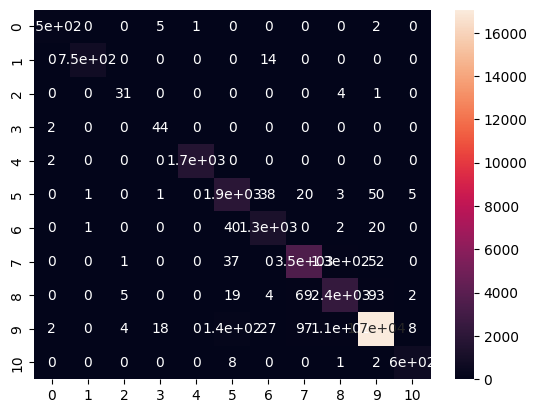

In [13]:
cm = confusion_matrix(prediction, y_test)
sns.heatmap(cm, annot=True)

In [14]:
from funcs import feature_importance_plotter

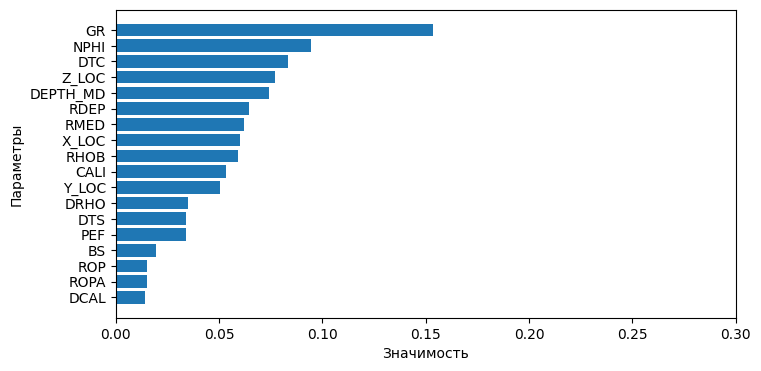

In [15]:
feature_importance_plotter(model=clf, feature_names=['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RMED', 'RDEP', 'RHOB',
       'GR', 'NPHI', 'PEF', 'DTC', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'ROPA'])